![alttext](logo.png)

### Team Tomato: Gustavo Morales - Eduardo López
### Generación :  G10
### Profesores : Heriberto Briceño - Giannina Salomo 
### Fecha : Lunes 2 de Marzo de 2020

▣ Hito 1: Preliminares y aspectos computacionales.\
▣ Hito 2: Análisis exploratorio e ingeniería de atributos.\
▢ Hito 3: Modelación descriptiva.\
▢ Hito 4: Modelación predictiva.

# H1: Preliminares y aspectos computacionales

### Descripción del problema 
Debemos analizar los crímenes en la ciudad de de Nueva York. Mediante la información entregada por el departamento de policia de New York se solicita un estudio que entregue de manera detallada si ocurrió o no un arresto, y ademas si un procedimiento policial concluirá en alguna acción violenta.

### Objetivo 
Desarrollar varios modelos de clasificación para definir si existira violencia durante un procedimiento policial y si ocurrió un arresto o no.

### Solución 
Desarrollo de modelos de clasificación. Una vez entrenados y puestos a prueba serán calificados y evaluados entre ellos para definir que modelo es mas exacto y preciso al momento de clasificar. Luego se llevará a cabo el paso fundamental de definir las clases correspondientes a violencia y arresto.

### Métricas de desempeño
Las métricas de desempeño caracterizan la eficiencia de nuestros modelos. Antes de presentar soluciones estrictamente cuantitativas se procederá a graficar las variables consideradas relevantes para la solución de este problema, mostrando gráficos de distribución relevantes al problema.

Para el caso de clasificación se utilizaran las siguientes metricas de desempeño:
* `precision`: la exactitud se define como la cantidad de predicciones positivas que fueron correctas.
* `recall`: el porcentaje de casos positivos detectados.
* `accuracy`: la fracción de predicciones correctas entre el número total de registros.
* `F1-score`: para cuantificar el balance entre `precision` y `recall`.
* `ROC curve`: es más bien un gráfico de apoyo, útil para visualizar la capacidad de diagnóstico de un clasificador binario. Similarmente, el área bajo la curva ROC, `AUC score`, cuantifica el poder del modelo para discriminar entre dos clases.

### Aspectos computacionales

Para la ingesta y preprocesamiento de datos se utilizarán las librerías de `numpy` y `pandas`. Para la visualización de datos se utilizarán las librerías de `matplotlib` y `seaborn`.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use('seaborn')

### Librerias para Machine Learning
Las librerias a continuación facilitan la creación de un modelo en base a la predicción de un vector objetivo utilizando modelos de clasificación.

Dado que se trabajara con un problema de aprendizaje supervisado, se utilizaran los siguientes modelos:

#### Modelos
   * GradientBoostingClassifier
       * Hiperparametros:
       ```python
          gradient_params = {
              'learning_rate': [0.01, 0.1,0.5],  # shrinks the contribution of each classifier
              'n_estimators': [50, 100, 500, 1000, 2000],  # max number of estimators at which boosting is terminated
              'subsample': [0.1,0.5,0.9]  # fraction of samples to be used for fitting the individual base learners
          }
       ```
   * AdaBoostClassifier
        * Hiperparametros: 
        ```python 
           ada_params = {
               'learning_rate': [0.01, 0.1, 0.5],  # shrinks the contribution of each classifier
               'n_estimators': [50, 100, 500, 1000, 2000]  # max number of estimators at which boosting is terminated
           }
        ```
   * DecisionTreeClassifier
        * Hiperparametros: 
        ```python
           dec_tree_params = {
                'min_samples_split' : range(10,500,20),
                'max_depth': range(1,20,2)
                 }
        ```
   * LogisticRegression
        ```python
           log_params = {
                "C":np.logspace(-3,3,7), # [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
                "penalty":["l1","l2"] # l1 lasso l2 ridge
            } 
        ```
   * SVC
        * Hiperparametros:
        ```python
           params = {
               'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # regularization parameter, l2 penalty
               'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]  # kernel coefficient
           }
           cv = 10
        ```

#### Selección de submuestras
   * Usaremos el método `train_test_split`, que divide la matriz de datos de manera aleatoria, generando sets de entrenamiento y prueba. Utilizaremos un 33% del total para la muestra de entrenamiento y el resto para la muestra de prueba, con una semilla pseudoaleatoria con valor 63.

#### Módulos para implementación de modelos

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#### Módulos para selección y medición de desempeño de modelos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

#### Módulo para optimizar procesos de aprendizaje en modelos

In [4]:
from sklearn.pipeline import Pipeline

#### Módulo para selección de mejores hiperparámetros según modelo

In [5]:
from sklearn.model_selection import GridSearchCV

#### Módulo para serialización de modelos, funciones auxiliares y filtro advertencias

In [6]:
import pickle
import preproc_nyc_sqf as pre_funcs
import aux_funcs as funcs
import warnings
warnings.filterwarnings('ignore')

#### Módulo para ejercer estrategia de oversampling en caso de existir desbalance de clases

In [7]:
from imblearn.over_sampling import SMOTE

# H2: Análisis exploratorio e ingeniería de atributos

### Ingeniería de atributos (_Feature Engineering_)

Primero observamos el set de datos y revisamos su integridad:

In [8]:
df = pd.read_csv("2009_1perc.csv").drop(columns = "Unnamed: 0")
df_test = pd.read_csv("2010_1perc.csv").drop(columns = "Unnamed: 0")

In [9]:
df

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,2009,52,3719,3282009,210,A,O,P,1.0,ASSAULT,...,,52,A,,,1009910,0255837,CM,1,9
5808,2009,79,15751,9292009,2008,A,O,P,3.0,CPW,...,,79,F,17,,1001545,0192836,CM,1,20
5809,2009,69,3024,6262009,1937,1,O,P,1.0,FEL,...,,69,B,,,1012860,0174682,CM,1,85
5810,2009,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,...,,76,A,10,,0981820,0185424,CM,1,27


In [10]:
df_test

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1,FELONY,...,,115,E,,,1014722,214388,CM,1,85


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 111 entries, year to detailcm
dtypes: float64(1), int64(18), object(92)
memory usage: 4.9+ MB


Notar que NO existen valores perdidos (NaN).

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Columns: 111 entries, year to detailcm
dtypes: int64(16), object(95)
memory usage: 5.1+ MB


Ahora generamos los objetos de pandas de forma apropiada:

In [13]:
df, cat_att, num_att = pre_funcs.create_suitable_dataframe(df)
df_test, cat_att_test, num_att_test = pre_funcs.create_suitable_dataframe(df_test)

['perobs']
[]


In [14]:
df

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,post,month,meters
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,,4,1.798320
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,BRONX,E,U,,10,1.920240
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,35,12,1.676400
5,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,,5,1.767840
6,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,N,U,,11,1.557528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,A,O,P,V,Y,Y,N,N,Y,N,...,B,BK,BR,M,BRONX,N,U,3,5,1.554480
5808,A,O,P,P,Y,N,N,N,N,N,...,B,BK,BR,T,BROOKLYN,F,17,,9,1.557528
5809,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BROOKLYN,B,U,,6,1.737360
5810,1,O,H,P,Y,N,Y,N,Y,N,...,B,BK,BR,T,BROOKLYN,A,10,,3,1.767840


#### Análisis exploratorio tanto para atributos contínuos como discretos.

##### → set de datos 2009

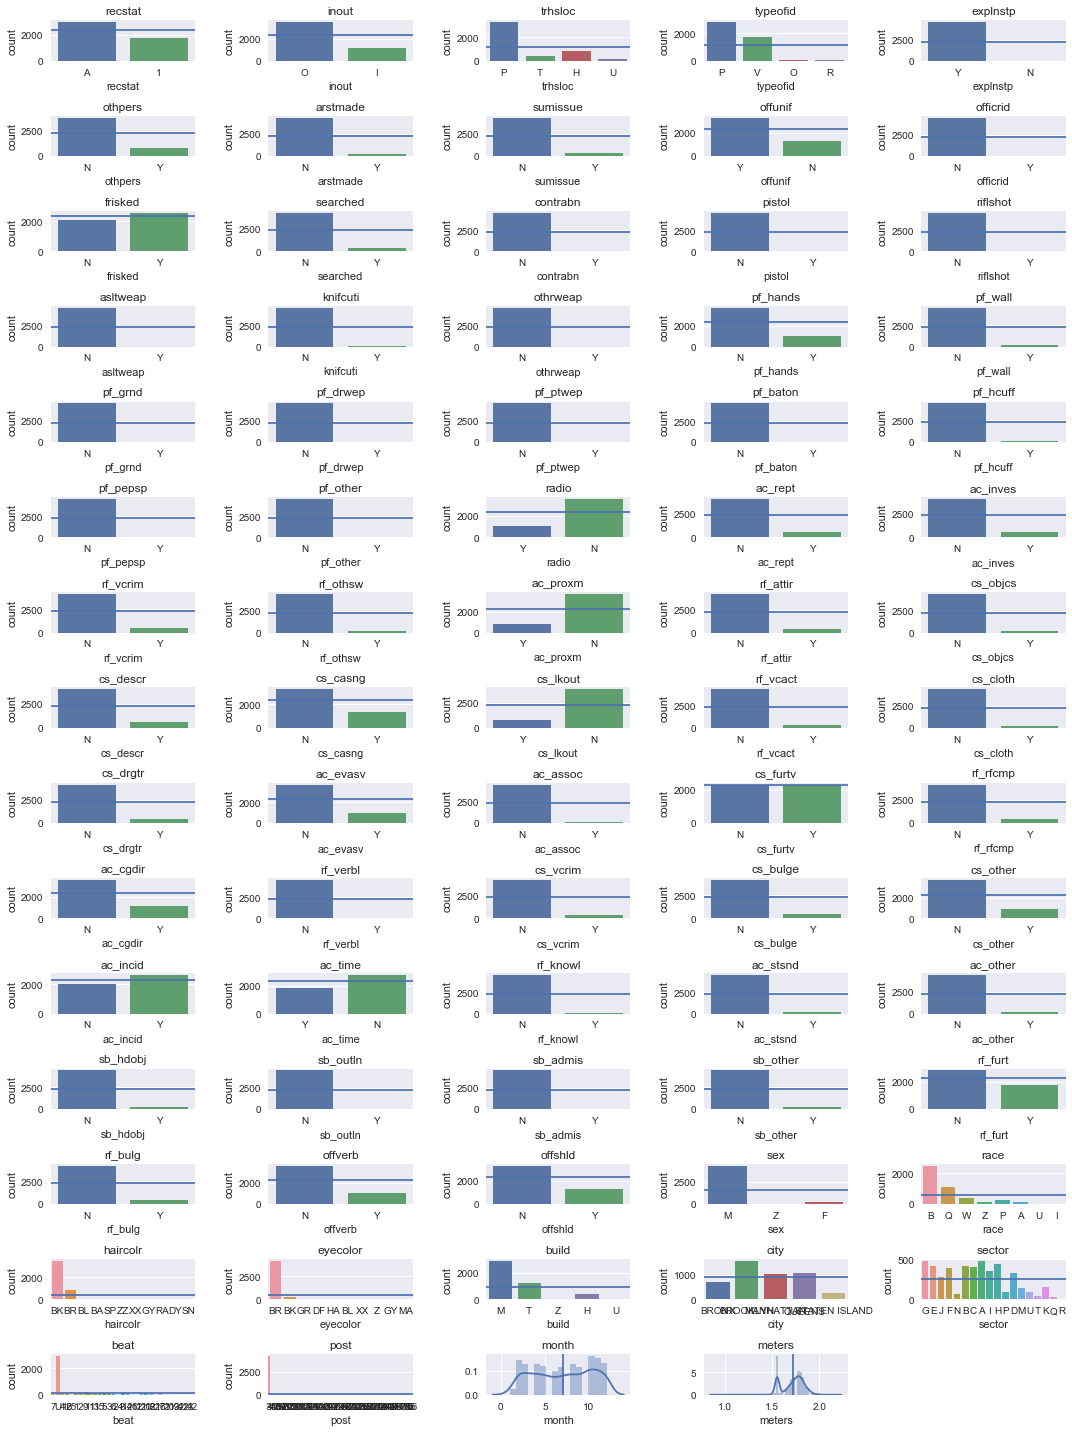

In [15]:
plt.figure(figsize = (15, 20))
funcs.plot_describe_variables(df, 15, 5)

Dado el gráfico de distribuciones se procede a eliminar columnas que no generan ningun aporte al estudio:

* `asltweap`
* `post`
* `beat`
* `meters`

→ set de datos 2010

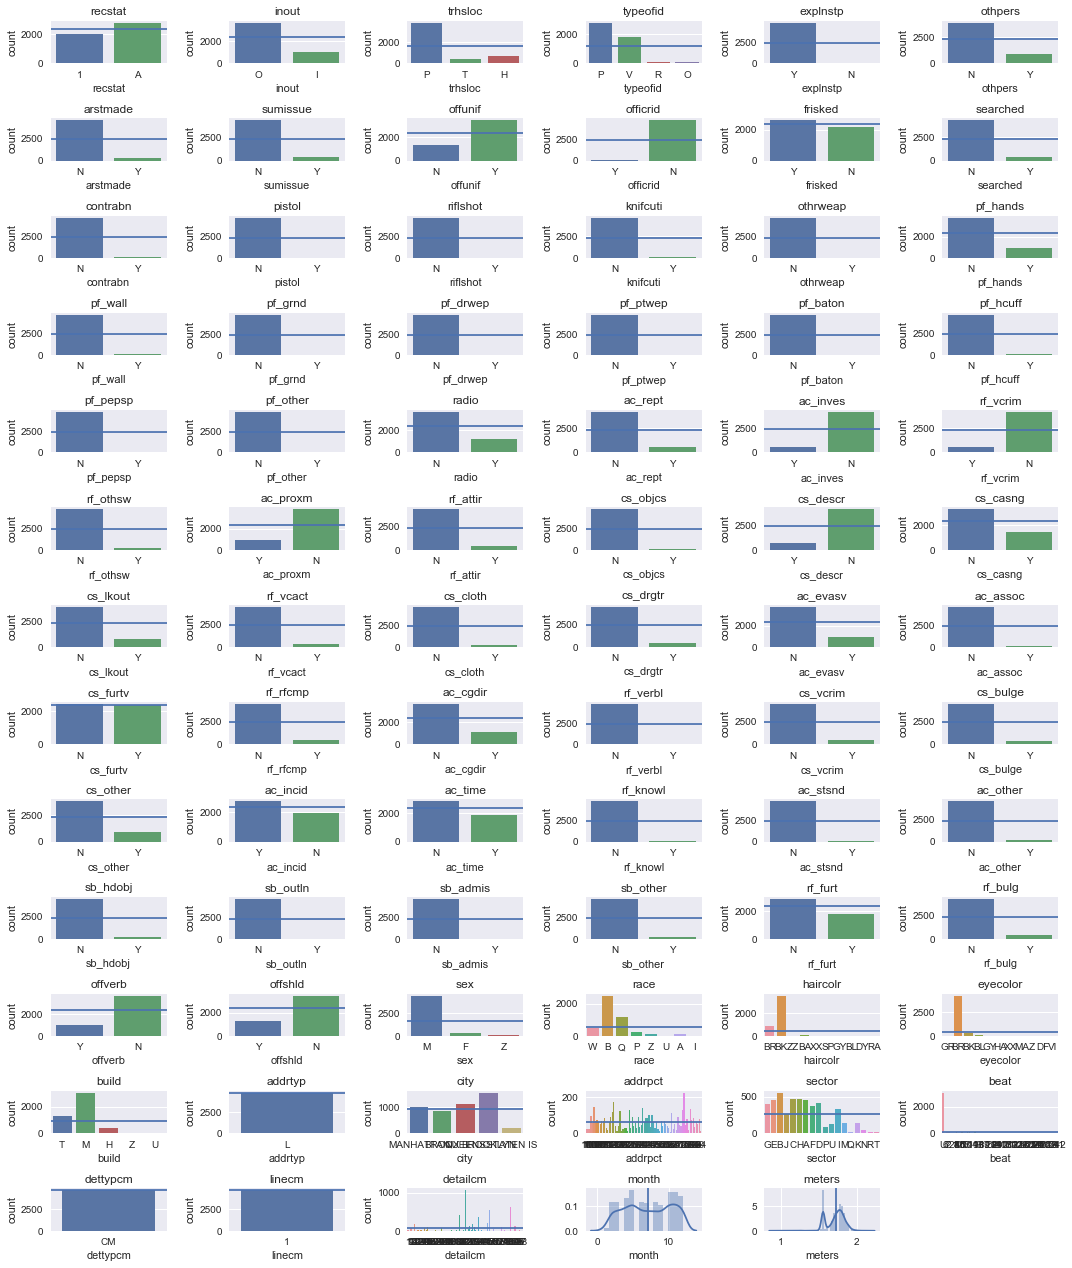

In [16]:
plt.figure(figsize = (15, 20))
funcs.plot_describe_variables(df_test, 15, 6)

Dado el gráfico de distribuciones se procede a eliminar columnas que no generan ningun aporte al estudio:

* `addrpct`
* `beat`
* `dettypcm`
* `linecm`
* `detailcm`
* `meters`
* `addrtyp`

In [17]:
df = df.drop(columns = ['asltweap','post', 'beat', 'meters'])
df_test = df_test.drop(columns = ['addrpct', 'beat', 'dettypcm',
                                  'linecm', 'detailcm', 'meters','addrtyp'])

In [18]:
def plot_importance(fit_model, feat_names):
    """Plots attributes in terms of statistical importance."""
    tmp_importance = fit_model.best_estimator_.feature_importances_ # para acceder a features importantes
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(names[:20], tmp_importance[sort_importance][:20])
    plt.yticks(names[:20], names, rotation = 0)

A continuación binarizamos el dataset 2009 y 2010:

In [19]:
df = funcs.binarize_object(df)
df_test = funcs.binarize_object_wmin(df_test)

df = df.rename(columns = {"city_STATEN ISLAND": "city_STATEN_ISLAND"})

In [20]:
col_df = df.columns.tolist()
col_df_test = df_test.columns.tolist()
col_to_del = []

for i in range(len(col_df_test)):
    if col_df_test[i] not in col_df:
        col_to_del.append(col_df_test[i])

In [21]:
df = df.drop(columns = ['trhsloc_U','haircolr_SN','city_STATEN_ISLAND'])
df_test = df_test.drop(columns = col_to_del)

In [22]:
df.shape

(4636, 117)

In [23]:
df_test.shape

(4747, 117)

# Hito 3: Modelación y evaluación de rendimiento

## Primer vector objetivo - Si existe arresto o no
* vector objetivo: arstmade_Y

In [24]:
X_train = df.drop(columns='arstmade_Y') # se saca el vector objetivo
y_train = df['arstmade_Y']
X_test  = df_test.drop(columns='arstmade_Y') # se saca el vector objetivo
y_test  = df_test['arstmade_Y']

# Reordenamos para que queden las mismas columnas en el mismo orden

X_test = X_test.reindex(sorted(X_train.columns), axis=1)
X_train = X_train.reindex(sorted(X_train.columns), axis=1)

## Modelos 

### Gradient Boosting Classifier

```python
gradient_params = {
    'learning_rate': [0.01, 0.1,0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1,0.5,0.9]
}

grad_model_2009 = GridSearchCV(GradientBoostingClassifier(), gradient_params, cv=4).fit(X_train, y_train)
```

In [25]:
# pickle.dump(grad_model_2009, open('gradmodel_2009_arstmade.sav','wb')) 
grad_model_2009 = pickle.load(open('final_models/gradmodel_2009_arstmade.sav', 'rb'))
model_list = []
model_list.append(grad_model_2009)

Los mejores hiperparámetros para `GradientBoostingClassifier` están dados por:

In [26]:
print(grad_model_2009.best_params_)

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.9}


El desempeño de `GradientBoostingClassifer` utilizando mejor combinación de hiperparámetros está dada por:

In [27]:
pred_gradient = grad_model_2009.best_estimator_.predict(X_test)

In [28]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.85      0.63      0.72       309

    accuracy                           0.97      4747
   macro avg       0.91      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747



Luego, podemos graficar los principales factores asociados al arresto:

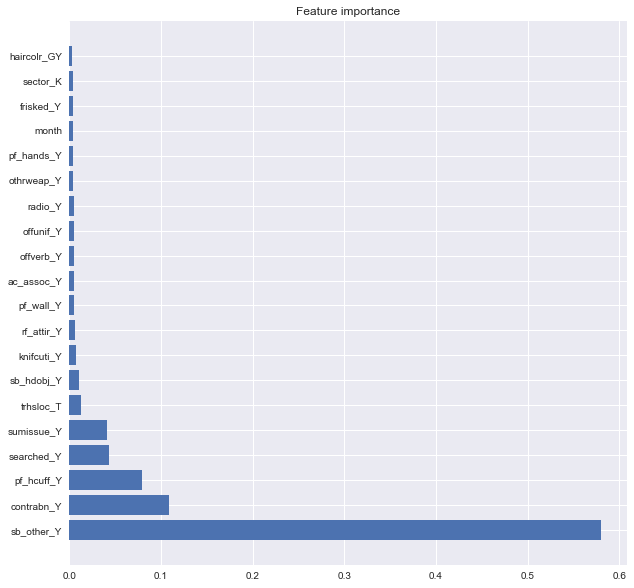

In [29]:
plt.rcParams['figure.figsize'] = 10, 10
plot_importance(grad_model_2009, X_test.columns)

Con ello, los atributos que aumentan de mayor manera la probabilidad de arresto son:

* `sb_other_Y`: BASIS OF SEARCH - OTHER → En qué se basan para investigar.
* `pf_hcuff_Y`: PHYSICAL FORCE - HANDCUFF → Existió fuerza física con uso de esposas.
* `contrabn_Y`: WAS CONTRABAND FOUND ON SUSPECT? → Si el sospechoso portaba ítemes de contrabando.

### Probabilidad de arresto segun barrio, raza y sexo

In [30]:
# generamos las PREDICCIONES DE PROBABILIDAD para un arresto
pred_proba_arstmade = grad_model_2009.best_estimator_.predict_proba(X_test)
df["prob"] = pd.Series(pred_proba_arstmade[:, 1])

states_pr = df.groupby(by = ["city_BROOKLYN","city_MANHATTAN","city_QUEENS",
                                  "sex_M","sex_Z",
                                  "race_B","race_I","race_P","race_Q","race_U",
                                  "race_W","race_Z"]).mean()

prob_df = pd.DataFrame(states_pr.loc[:, "prob"].sort_values(ascending = False))


In [31]:
prob_df.T.head()

city_BROOKLYN          0                   1                   0            \
city_MANHATTAN         0                   0                   0             
city_QUEENS            0                   0                   1             
sex_M                  0                   0                   0             
sex_Z                  1                   0                   1         0   
race_B                 1         0         0                   1         0   
race_I                 0         0         1         0         0         0   
race_P                 0         1         0         0         0         0   
race_Q                 0         0         0         1         0         1   
race_U                 0         0         0         0         0         0   
race_W                 0         0         0         0         0         0   
race_Z                 0         0         0         0         0         0   
prob            0.846055  0.333986  0.258687  0.217591  0.212883  0.205058   

city_BROOKLYN          1         0                      ...            \
city_MANHATTAN         0         1         0            ...             
city_QUEENS            0         0         1         0  ...             
sex_M                  1         1         0         0  ...             
sex_Z                  0         0         0         1  ...             
race_B                 0         0         0         0  ...             
race_I                 0         0         0         0  ...             
race_P                 0         0         0         0  ...             
race_Q                 0         0         0         1  ...         0   
race_U                 0         0         0         0  ...         1   
race_W                 0         0         1         0  ...         0   
race_Z                 1         1         0         0  ...         0   
prob            0.185195  0.172898  0.172428  0.167712  ...  0.015152   

city_BROOKLYN          1         0         1         0                   1  \
city_MANHATTAN         0         0         0         0                   0   
city_QUEENS            0         0         0         1         0         0   
sex_M                  1         0         0         0         0         0   
sex_Z                  0         0         0         1         0         1   
race_B                 0         0         0         0         0         1   
race_I                 0         0         0         0         0         0   
race_P                 0         0         0         0         1         0   
race_Q                 0         0         0         0         0         0   
race_U                 1         0         0         0         0         0   
race_W                 0         0         0         0         0         0   
race_Z                 0         1         1         1         0         0   
prob            0.015139  0.014611  0.014346  0.014333  0.014269  0.014141   

city_BROOKLYN          0                 1  
city_MANHATTAN         1                 0  
city_QUEENS            0                 0  
sex_M                  0                 0  
sex_Z                  0         1       0  
race_B                 0         0       0  
race_I                 0         0       0  
race_P                 1         0       1  
race_Q                 0         1       0  
race_U                 0         0       0  
race_W                 0         0       0  
race_Z                 0         0       0  
prob            0.013775  0.012857  0.0126  

[1 rows x 73 columns]

### Adaptive Boosting Classifier

```python
ada_params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}

ada_model_2009 = GridSearchCV(AdaBoostClassifier(random_state=63), ada_params, cv=4).fit(X_train, y_train)
```

In [32]:
# pickle.dump(ada_model_2009, open('adamodel_2009_arstmade.sav','wb')) 
ada_model_2009 = pickle.load(open('adamodel_2009_arstmade.sav', 'rb'))
model_list.append(ada_model_2009)

Los mejores hiperparámetros para para `AdaBoostClassifier` están dados por:

In [33]:
print(ada_model_2009.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500}


El desempeño de `AdaBoostClassifier` utilizando mejor combinación de hiperparámetros está dada por:

In [34]:
print(classification_report(y_test, ada_model_2009.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.86      0.55      0.67       309

    accuracy                           0.96      4747
   macro avg       0.92      0.77      0.83      4747
weighted avg       0.96      0.96      0.96      4747



### Decision Tree Classifier

```python
dec_tree_params = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2)}

dec_tree_model = GridSearchCV(DecisionTreeClassifier(),dec_tree_params).fit(X_train, y_train)
```

In [35]:
# pickle.dump(dec_tree_model, open('dectree_2009_arstmade.sav','wb')) 
dec_tree_model = pickle.load(open('dectree_2009_arstmade.sav', 'rb'))
model_list.append(dec_tree_model)

Los mejores hiperparámetros para para `DecisionTreeClassifier` están dados por:

In [36]:
print(dec_tree_model.best_params_)

{'max_depth': 3, 'min_samples_split': 10}


El desempeño de `DecisionTreeClassifier` utilizando mejor combinación de hiperparámetros está dada por:

In [37]:
print(classification_report(y_test, dec_tree_model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.86      0.53      0.65       309

    accuracy                           0.96      4747
   macro avg       0.91      0.76      0.82      4747
weighted avg       0.96      0.96      0.96      4747



### SVC

```python
svc_params = {
     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # regularization parameter, l2 penalty
     'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]  # kernel coefficient
 }

svc_model = GridSearchCV(SVC(kernel = "rbf", probability = True),
                         svc_params, 
                         cv = 4, return_train_score = True).fit(X_train, y_train)
```

In [38]:
# pickle.dump(svc_model, open('svc_2009_arstmade.sav','wb')) 
svc_model = pickle.load(open('final_models/svc_2009_arstmade.sav', 'rb'))
model_list.append(svc_model)

Los mejores hiperparámetros para para `SVC` están dados por:

In [39]:
print(svc_model.best_params_)

{'C': 1000, 'gamma': 0.001}


El desempeño de `SVC` utilizando mejor combinación de hiperparámetros está dada por:

In [40]:
print(classification_report(y_test, svc_model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.83      0.63      0.72       309

    accuracy                           0.97      4747
   macro avg       0.90      0.81      0.85      4747
weighted avg       0.97      0.97      0.97      4747



### Logistic Regression

```python
log_params = {
            "C":np.logspace(-3,3,7), # [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
            "penalty":["l1","l2"] # l1 lasso l2 ridge
            } 

log_model = GridSearchCV(LogisticRegression(),
                         log_params, cv = 10).fit(X_train, y_train)
```

In [41]:
# pickle.dump(log_model, open('logmodel_2009_arstmade.sav','wb')) 
log_model = pickle.load(open('logmodel_2009_arstmade.sav', 'rb'))
model_list.append(log_model)

Los mejores hiperparámetros para para `LogisticRegression` están dados por:

In [42]:
print(log_model.best_params_)

{'C': 1.0, 'penalty': 'l2'}


El desempeño de `LogisticRegression` utilizando mejor combinación de hiperparámetros está dada por:

In [43]:
print(classification_report(y_test, log_model.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4438
           1       0.85      0.58      0.69       309

    accuracy                           0.97      4747
   macro avg       0.91      0.79      0.84      4747
weighted avg       0.96      0.97      0.96      4747



### Curva ROC y su respectivo AUC (area bajo la curva) para cada modelo estudiado

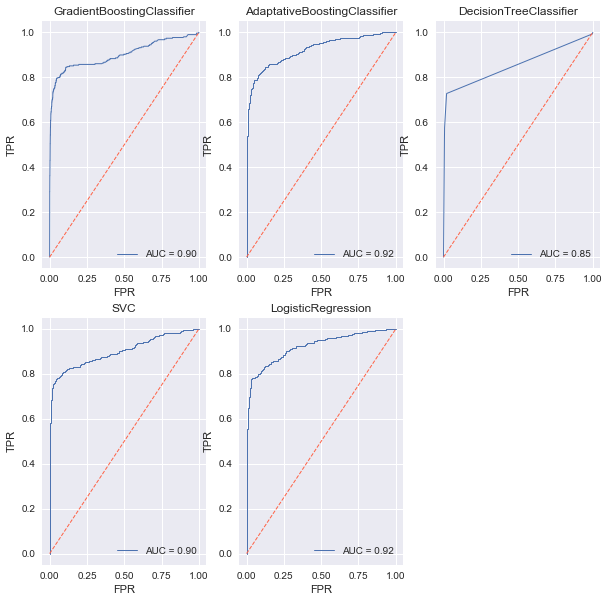

In [44]:
model_name = ["GradientBoostingClassifier", "AdaptativeBoostingClassifier",
             "DecisionTreeClassifier", "SVC", "LogisticRegression"]
for i in range(len(model_list)):
    plt.subplot(2, 3, i + 1)
    funcs.plot_roc_curve(model_list[i], y_test, X_test,model_name[i])

### Reporte de metricas de desempeño para cada modelo estudiado: <br>
| Modelo\Metrica               | Precision        | Recall           | F1-score         | Accuracy |
|------------------------------|------------------|------------------|------------------|----------|
| GradientBoostingClassifier   | 0: .97<br>1: .85 | 0: .99<br>1: .63 | 0: .98<br>1: .72 | .97      |
| AdaptativeBoostingClassifier | 0: .97<br>1: .86 | 0: .99<br>1: .55 | 0: .98<br>1: .67 | .96      |
| DecisionTreeClassifier       | 0: .97<br>1: .86 | 0: .99<br>1: .53 | 0: .98<br>1: .65 | .96      |
| SVC                          | 0: .97<br>1: .83 | 0: .99<br>1: .63 | 0: .98<br>1: .72 | .97      |
| LogisticRegression           | 0: .97<br>1: .85 | 0: .99<br>1: .58 | 0: .98<br>1: .69 | .97      |

<br>
Dado que el accuracy para todos los modelos es el mismo o solo varia por centecimas se decide seleccionar al mejor modelo en base a su desempeño en la metrica F1-score para clasificar tanto 0 como 1, ademas del valor entregado por el area bajo la curva segun gráfico de curva ROC.

Siguiendo lo ya mencionado, los 2 mejores modelos según su desempeño son:
* `GradientBoostingClassifier`: 
    * F1-score -> 0: 0.98, 1: 0.72 
    * AUC -> 0.90
* `SVC`:
    * F1-score -> 0: 0.98, 1: 0.72
    * AUC -> 0.90

## Generación del segundo vector objetivo - Si existió violencia o no: 
Para generar el vector objetivo se utilizarán como referencia los siguientes atributos: 

* `pf_hands`: PHYSICAL FORCE USED BY OFFICER - HANDS
* `pf_wall`: PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL 
* `pf_grnd`: PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND
* `pf_drwep`: PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN
* `pf_ptwep`: PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED 
* `pf_baton`: PHYSICAL FORCE USED BY OFFICER - BATON
* `pf_hcuff`: PHYSICAL FORCE USED BY OFFICER - HANDCUFF
* `pf_pepsp`: PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY 
* `pf_other`: PHYSICAL FORCE USED BY OFFICER - OTHER

In [45]:
df_pf = df.loc[:,"pf_hands_Y":"pf_other_Y"]
df_test_pf = df_test.loc[:, "pf_hands_Y":"pf_other_Y"]

### Generación de segundo vector objetivo - Si ocurrió violencia si o no
* `PF` -> Physical Force

In [46]:
df["PF"] = -1
df_test["PF"] = -1

In [47]:
for i, row in df_pf.iterrows():
    df["PF"][i] = 1 if (row == 1).any() else 0
    
for i, row in df_test_pf.iterrows():
    df_test["PF"][i] = 1 if (row == 1).any() else 0

In [48]:
df["PF"].value_counts()

0    3500
1    1136
Name: PF, dtype: int64

In [49]:
df_test["PF"].value_counts()

0    3639
1    1108
Name: PF, dtype: int64

In [50]:
cols = df_pf.columns.tolist()
cols_test = df_test_pf.columns.tolist()

Se eliminan las columnas que generaron el nuevo vector objetivo para evitar colinealidad.

In [51]:
df = df.drop(columns = cols)
df_test = df_test.drop(columns = cols_test)

## Modelos 

In [52]:
X_train = df.drop(columns=['prob','PF']) # se saca el vector objetivo
y_train = df['PF']
X_test  = df_test.drop(columns='PF') # se saca el vector objetivo
y_test  = df_test['PF']

# Reordenamos para que queden las mismas columnas en el mismo orden

X_test = X_test.reindex(sorted(X_train.columns), axis=1)
X_train = X_train.reindex(sorted(X_train.columns), axis=1)

Dado que existe un desbalance de clases notorio, se decide utilizar tecnica de oversampling para mejorar el desempeño de los modelos al momento de clasificar.

Esta estrategia consiste en incrementar los datos en la clase minoritaria.

In [53]:
oversampler = SMOTE(random_state = 63, sampling_strategy = "minority", ratio = "minority")
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

### Gradient Boosting Classifier

```python
gradient_params = {
    'learning_rate': [0.01, 0.1,0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1,0.5,0.9]
}

grad_model_2009_PF = GridSearchCV(GradientBoostingClassifier(), gradient_params, cv=4).fit(X_train_oversamp, y_train_oversamp)
```

In [54]:
# pickle.dump(grad_model_2009_PF, open('gradmodel_2009_PF.sav','wb')) 
grad_model_2009_PF = pickle.load(open('final_models/gradmodel_2009_PF.sav', 'rb'))
model_list_PF = []
model_list_PF.append(grad_model_2009_PF)

Los mejores hiperparámetros para para `GradientBoostingClassifier` están dados por:

In [55]:
grad_model_2009_PF.best_params_

{'learning_rate': 0.5, 'n_estimators': 1000, 'subsample': 0.9}

El desempeño de `GradientBoostingClassifer` utilizando mejor combinación de hiperparámetros está dada por:

In [56]:
print(classification_report(y_test, grad_model_2009_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3639
           1       0.42      0.45      0.43      1108

    accuracy                           0.73      4747
   macro avg       0.62      0.63      0.63      4747
weighted avg       0.73      0.73      0.73      4747



### Adaptative Boosting Classifier

```python
ada_params = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 500, 1000, 2000]}

ada_model_2009_PF = GridSearchCV(AdaBoostClassifier(random_state = 63), ada_params,
                             cv = 4).fit(X_train_oversamp, y_train_oversamp)
```

In [57]:
# pickle.dump(ada_model_2009_PF, open('adamodel_2009_PF.sav','wb')) 
ada_model_2009_PF = pickle.load(open("adamodel_2009_PF.sav", 'rb'))
model_list_PF.append(ada_model_2009_PF)

Mejores hiperparametros para `AdaBoostClassifier`:

In [58]:
ada_model_2009_PF.best_params_

{'learning_rate': 0.5, 'n_estimators': 2000}

Desempeño de `AdaBoostClassifier` utilizando mejor combinación de hiperparametros:

In [59]:
print(classification_report(y_test, ada_model_2009_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3639
           1       0.40      0.42      0.41      1108

    accuracy                           0.72      4747
   macro avg       0.61      0.62      0.61      4747
weighted avg       0.72      0.72      0.72      4747



### Decision Tree Classifier

```python
dec_tree_params = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2)}

dec_tree_model_PF = GridSearchCV(DecisionTreeClassifier(),dec_tree_params).fit(X_train_oversamp, y_train_oversamp)
```

In [60]:
# pickle.dump(dec_tree_model_PF, open('dectreemodel_2009_PF.sav','wb')) 
dec_tree_model_PF = pickle.load(open("dectreemodel_2009_PF.sav", 'rb'))
model_list_PF.append(dec_tree_model_PF)

Mejores hiperparametros para `DecisionTreeClassifier`:

In [61]:
dec_tree_model_PF.best_params_

{'max_depth': 19, 'min_samples_split': 30}

Desempeño de `DecisionTreeClassifier` utilizando mejor combinación de hiperparametros:

In [62]:
print(classification_report(y_test, dec_tree_model_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79      3639
           1       0.39      0.52      0.45      1108

    accuracy                           0.70      4747
   macro avg       0.61      0.64      0.62      4747
weighted avg       0.73      0.70      0.71      4747



### SVC 

```python
svc_params = {
     'C': [0.0001, 0.1, 100, 1000],  # regularization parameter, l2 penalty
     'gamma': [0.0000001, 0.1, 1, 10]  # kernel coefficient
 }

svc_model_PF = GridSearchCV(SVC(kernel = "rbf", probability = True),
                         svc_params, 
                         cv = 5, return_train_score = True).fit(X_train_oversamp, y_train_oversamp)
```

In [63]:
# pickle.dump(svc_model_PF, open('svcmodel_2009_PF.sav','wb')) 
svc_model_PF = pickle.load(open("svcmodel_2009_PF.sav", 'rb'))
model_list_PF.append(svc_model_PF)

Mejores hiperparametros para `SVC`:

In [64]:
print(svc_model_PF.best_params_)

{'C': 100, 'gamma': 0.1}


Desempeño de `SVC` utilizando mejor combinación de hiperparametros:

In [65]:
print(classification_report(y_test, svc_model_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      3639
           1       0.40      0.38      0.39      1108

    accuracy                           0.72      4747
   macro avg       0.60      0.60      0.60      4747
weighted avg       0.72      0.72      0.72      4747



### Logistic Regression

```python
log_params = {
            "C":np.logspace(-3,3,7), # [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
            "penalty":["l1","l2"] # l1 lasso l2 ridge
            } 

log_model_PF = GridSearchCV(LogisticRegression(), log_params, cv = 10).fit(X_train_oversamp, y_train_oversamp)
```

In [66]:
# pickle.dump(log_model_PF, open('logmodel_2009_PF.sav','wb')) 
log_model_PF = pickle.load(open("final_models/logmodel_2009_PF.sav", 'rb'))
model_list_PF.append(log_model_PF)

Mejores hiperparametros para `LogisticRegression`:

In [67]:
print(log_model_PF.best_params_)

{'C': 1000.0, 'penalty': 'l2'}


Desempeño de `LogisticRegression` utilizando mejor combinación de hiperparametros:

In [68]:
print(classification_report(y_test, log_model_PF.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3639
           1       0.42      0.43      0.42      1108

    accuracy                           0.73      4747
   macro avg       0.62      0.62      0.62      4747
weighted avg       0.73      0.73      0.73      4747



### Curva ROC y su respectivo AUC (area bajo la curva) para cada modelo estudiado

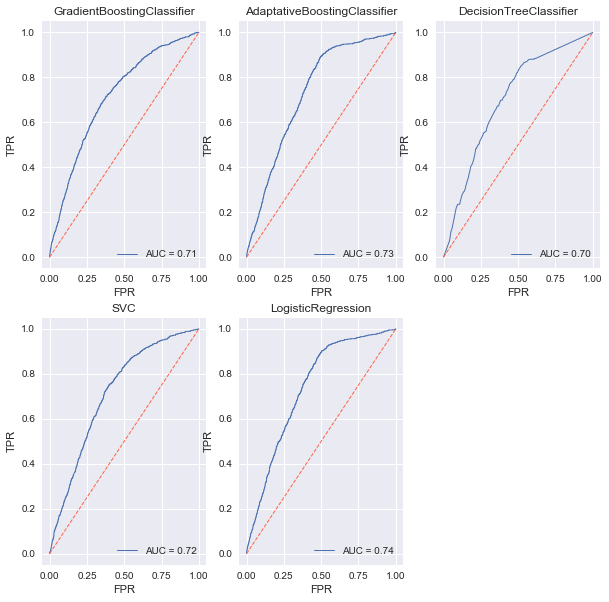

In [69]:
model_name = ["GradientBoostingClassifier", "AdaptativeBoostingClassifier",
             "DecisionTreeClassifier", "SVC", "LogisticRegression"]
for i in range(len(model_list_PF)):
    plt.subplot(2, 3, i + 1)
    funcs.plot_roc_curve(model_list_PF[i], y_test, X_test,model_name[i])

### Reporte de metricas de desempeño para cada modelo estudiado: <br>

| Modelo\Metrica               | Precision        | Recall           | F1-score         | Accuracy |
|------------------------------|------------------|------------------|------------------|----------|
| GradientBoostingClassifier   | 0: .83<br>1: .42 | 0: .81<br>1: .45 | 0: .82<br>1: .43 | .73      |
| AdaptativeBoostingClassifier | 0: .82<br>1: .40 | 0: .81<br>1: .42 | 0: .82<br>1: .41 | .72      |
| DecisionTreeClassifier       | 0: .84<br>1: .39 | 0: .76<br>1: .52 | 0: .79<br>1: .45 | .70      |
| SVC                          | 0: .81<br>1: .40 | 0: .82<br>1: .38 | 0: .82<br>1: .39 | .72      |
| LogisticRegression           | 0: .82<br>1: .42 | 0: .82<br>1: .43 | 0: .82<br>1: .42 | .73      |

<br> 

Existio un desempeño deficiente para la clasificación de valores 1, a pesar de esto los modelos de igual manera presentan un desempeño promedio estable.

Para definir cuales son los 2 mejores modelos respecto a su desempeño clasificando, se decide utilizar 3 valores, el porcentaje de clasificacion correcta para 0 y 1 dado por F1-score, el accuracy y el area bajo la curva dada por las curvas ROC.

Los 2 mejores modelos dadas sus metricas de desempeño son:
* GradientBoostingClassifier:
    * F1-score -> 0: 0.82, 1: 0.43
    * accurracy -> 0.73
    * AUC -> 0.71
* LogisticRegression:
    * F1-score -> 0: 0.82, 1: 0.42
    * accuracy -> 0.72
    * AUC -> 0.74

# Fin PRUEBA 2